In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', color_codes=True)
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
tip = sns.load_dataset("tips")
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


FacetGrid
   

FacetGrid object is initialized by passing a dataframe and name of variables to create the structure of axes. 




The variables used to initialize FacetGrid object needs to be categorical or discrete. The grid structure is created according to the number of categories. For instance, “time” column has two unique values.


In [4]:
tip.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

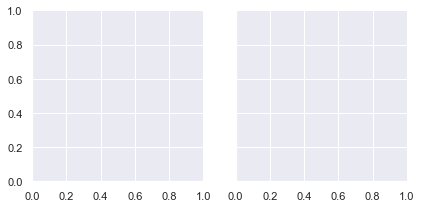

In [5]:
g = sns.FacetGrid(tip, col='time')

We’ve just created a very simple grid with two facets (each subplot is a facet). 

The size of facets are adjusted using height and aspect parameters.


Height is the height of facets in inches
Aspect is the ratio of width and height (width=aspect*height). Default value of aspect is 1.

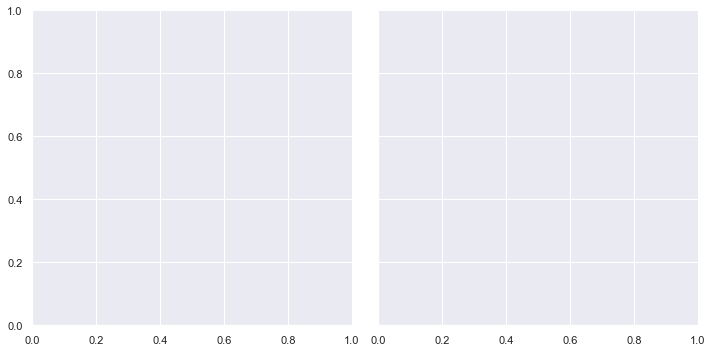

In [6]:
g = sns.FacetGrid(tip, col='time', height=5)

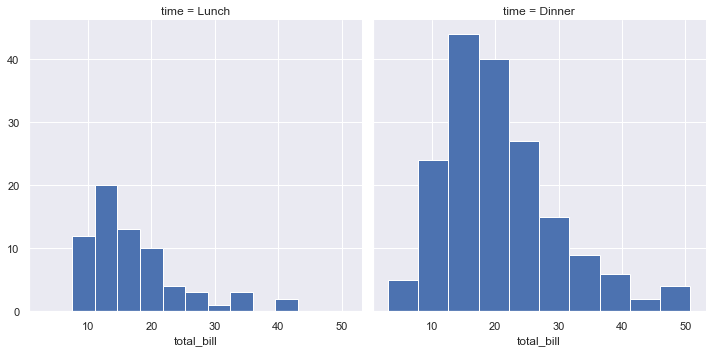

In [8]:
g = sns.FacetGrid(tip, col='time', height=5)
g.map(plt.hist, "total_bill");

The grid shows histogram of “total_bill” based on “time”. 

Depending on the plotting function, we may need to pass multiple variables for map method. For instance, scatter plots require two variables.

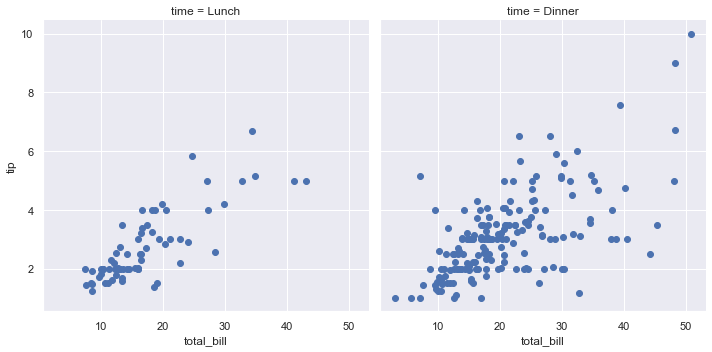

In [9]:
g = sns.FacetGrid(tip, col='time', height=5)
g.map(plt.scatter, "total_bill", "tip")

Let’s add one more dimension to the grid with row parameter.

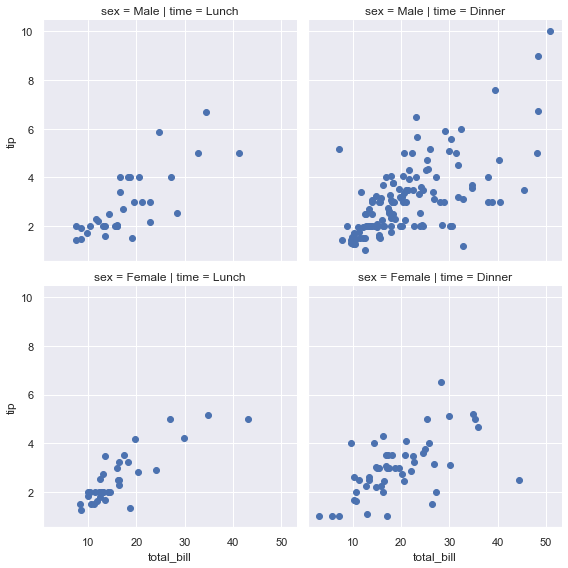

In [11]:
g = sns.FacetGrid(tip, row='sex', col='time', height=4)
g.map(plt.scatter, "total_bill", "tip")

Both “sex” and “time” columns have two distinct values so a 2x2 FacetGrid is created. 

As we can see from the plot above, “total_bill” and “tip” variables have a similar trend for males and females.

The hue parameter allows to add one more dimension to the grid with colors.

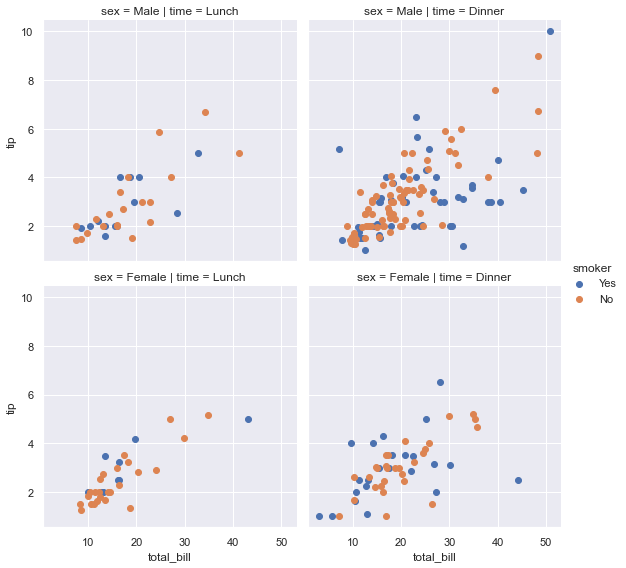

In [13]:
g = sns.FacetGrid(tip, row='sex', col='time', hue='smoker',    
                  height=4)
g.map(plt.scatter, "total_bill", "tip")
g.add_legend();

We now have an overview of the relationship among “total_bill”, “tip”, and “smoker” variables.

The “day” column has 4 unique values:

In [14]:
tip.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

We can create a FacetGrid that shows the distribution of “total_bill” in different days. It will show if customers spend more on any particular day.

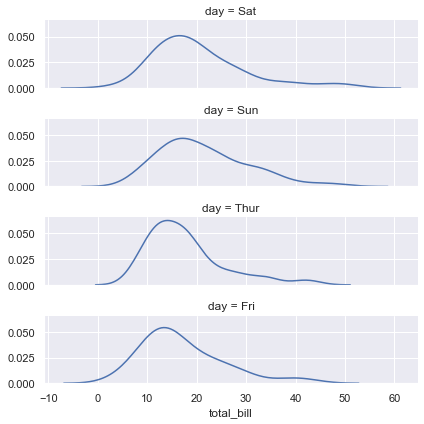

In [15]:
g = sns.FacetGrid(tip, row='day', 
                  row_order = tip.day.value_counts().index,
                  height=1.5, aspect=4)
g.map(sns.distplot, "total_bill", hist=False)

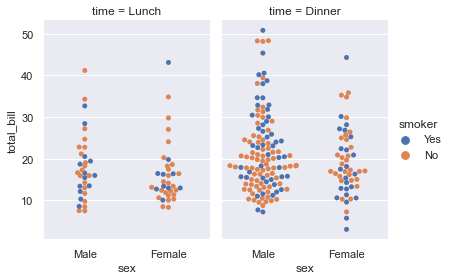

In [38]:
g = sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tip, kind="swarm", height=4, aspect=.7);

## New DataSet


In [23]:
bird= sns.load_dataset("penguins")

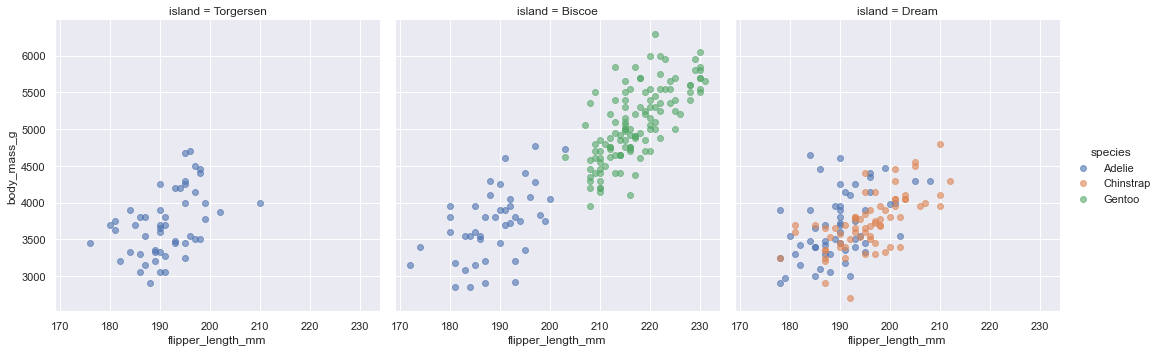

In [25]:
g = sns.FacetGrid(bird, col="island", hue="species", height=5)
g.map(plt.scatter, "flipper_length_mm", "body_mass_g", alpha=.6)
g.add_legend()
plt.show()

“Gentoo” species are only present on the island “Biscoe”.

Gentoo species is heavier and has a longer flipper length that other species.

“Adelie” species is available on all three islands and “Chinstrap” is only available on the island “Dream”.

#### StripPlot

A strip plot is a scatter plot where one of the variables is categorical. 

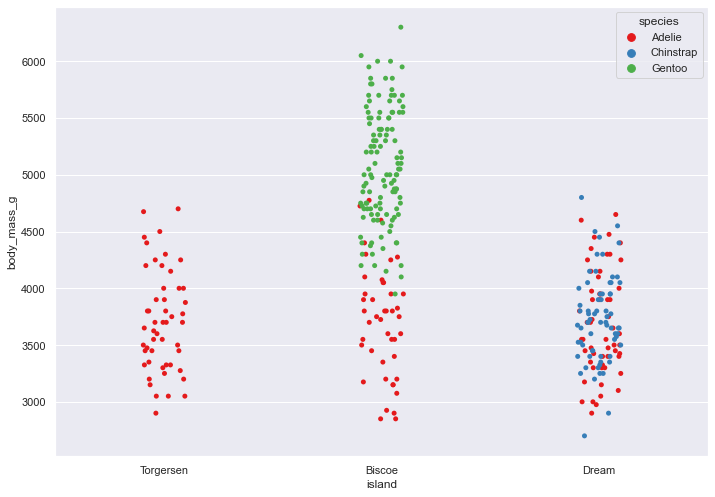

In [41]:
sns.stripplot(x="island", y="body_mass_g", hue= "species", data=bird, palette="Set1")
plt.show()

Strip plot is helpful to get an insight as long as plots are not overcrowded with densely populated data points. 

In the island “Dream” points are densely populated in the plot, and it is a bit difficult to get meaningful information from it.

#### SwarnPlots

Swarmplot can help to visualise the range of weight of the penguins by species in each of the islands non-overlapping points.

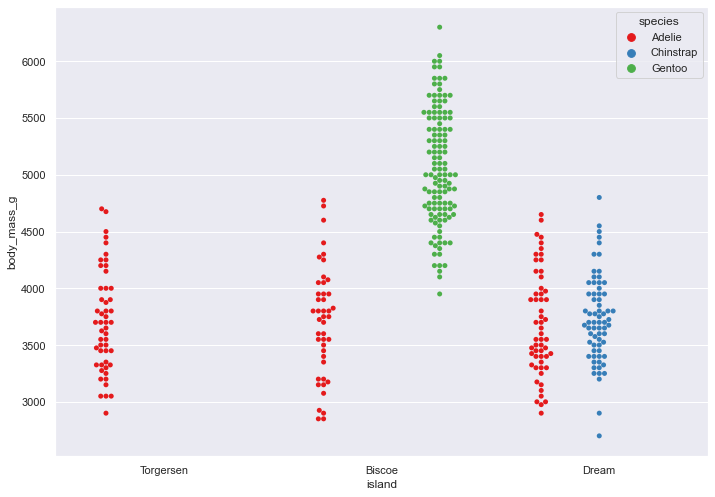

In [42]:
sns.swarmplot(x="island", y="body_mass_g", hue="species",data=bird, palette="Set1", dodge=True)
plt.show()

#### LM Plot

Before we dive into 'Linear Model' Plot, let us get a gist of Linear Regression.

Linear Regression is a statistical concept for predictive analytics, where the core agenda is to majorly examine three aspects:

Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?

Which variables in particular are significant predictors for the outcome variable?

In what way do they (indicated by the magnitude and sign of the beta estimates) impact the outcome variable? 

These Beta Estimates are just the standardized coefficients resulting from a regression analysis, that have been standardized so that the variances of dependent and independent variables are 1.

##### LM Plot SeaBorn

Every plot in Seaborn has a set of fixed parameters. 

For sns.lmplot(), we have three mandatory parameters and the rest are optional that we may use as per our requirements. 

These 3 parameters are values for X-axis, values for Y-axis and reference to dataset.

These 3 are pre-dominantly visible in almost all of Seaborn plots and in addition, there is an optional parameter which I would like you to memorize as it comes in very handy. 

This is hue parameter and it takes in categorical columns and kind of helps us to group our data plot as per hue parameter values. 

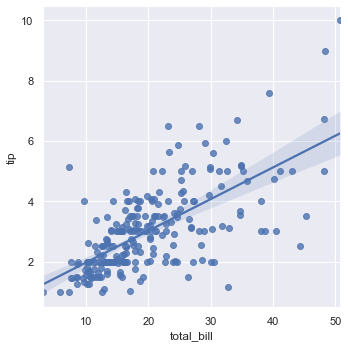

In [44]:
sns.lmplot(x="total_bill", y="tip", data=tip)

This linear line across our plot is the best available fit for the trend of the tip usually customers give with respect to the total bill that gets generated. 

And the data points that we see at extreme top right which are far away from this line are known as outliers in the dataset.

There is this shadow converging at the center where there is a chunk of our data. This convergent point is actually the statistical mean

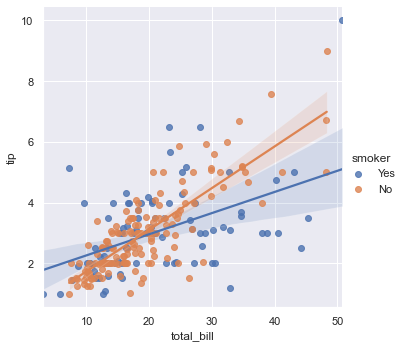

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",data=tip)

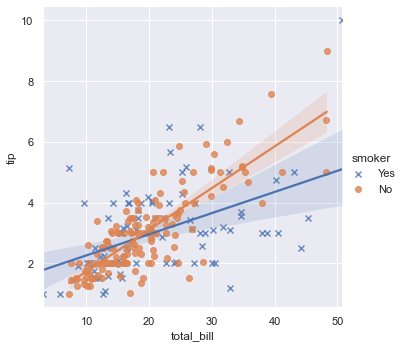

In [47]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",markers=["x", "o"], data=tip)

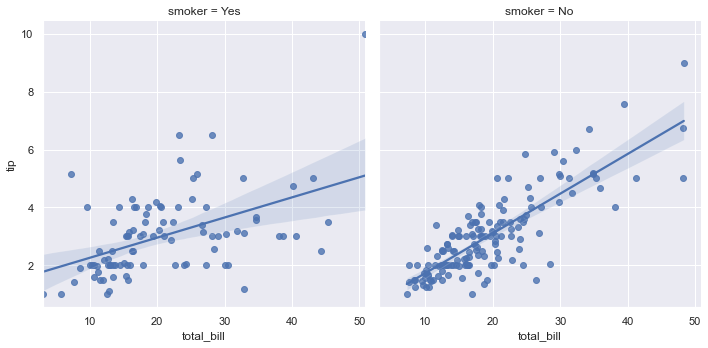

In [48]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tip)

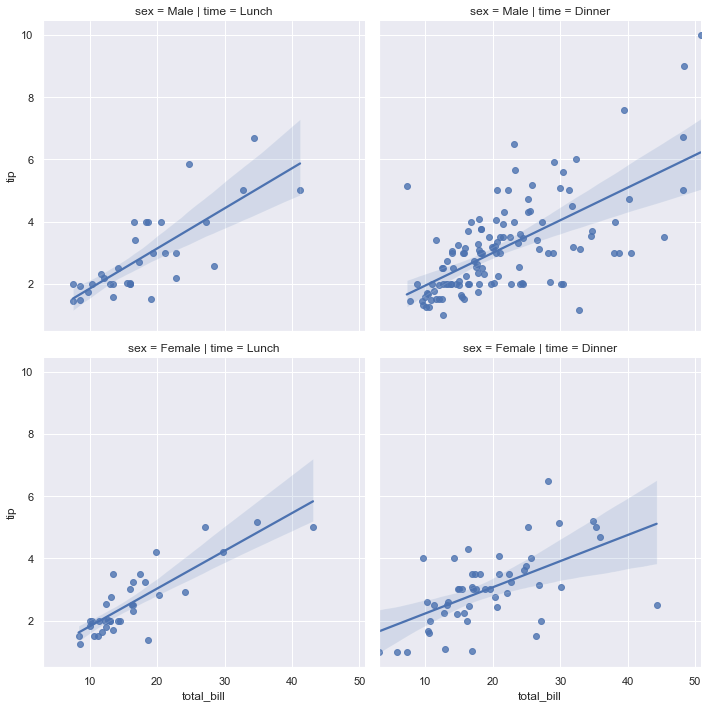

In [50]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tip);

LM Plot for Bird Data

In [52]:
bird.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


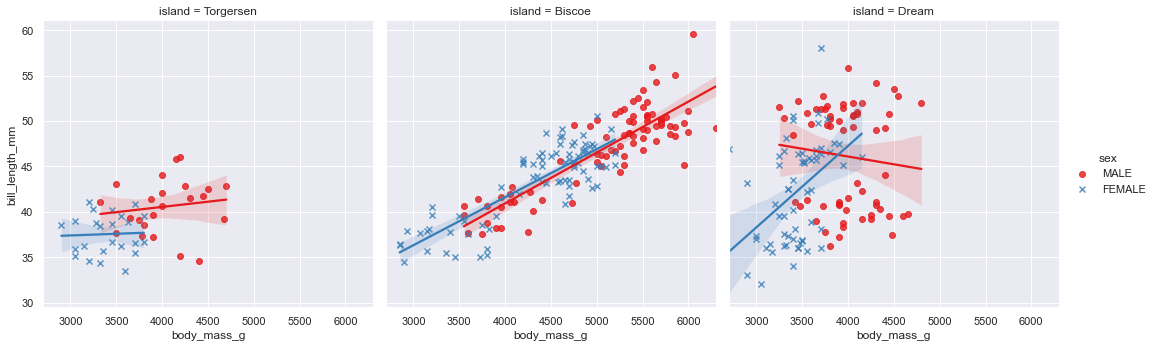

In [53]:
sns.lmplot(x="body_mass_g", y="bill_length_mm", hue="sex", col="island", markers=["o", "x"],palette="Set1",data=bird)
plt.show()

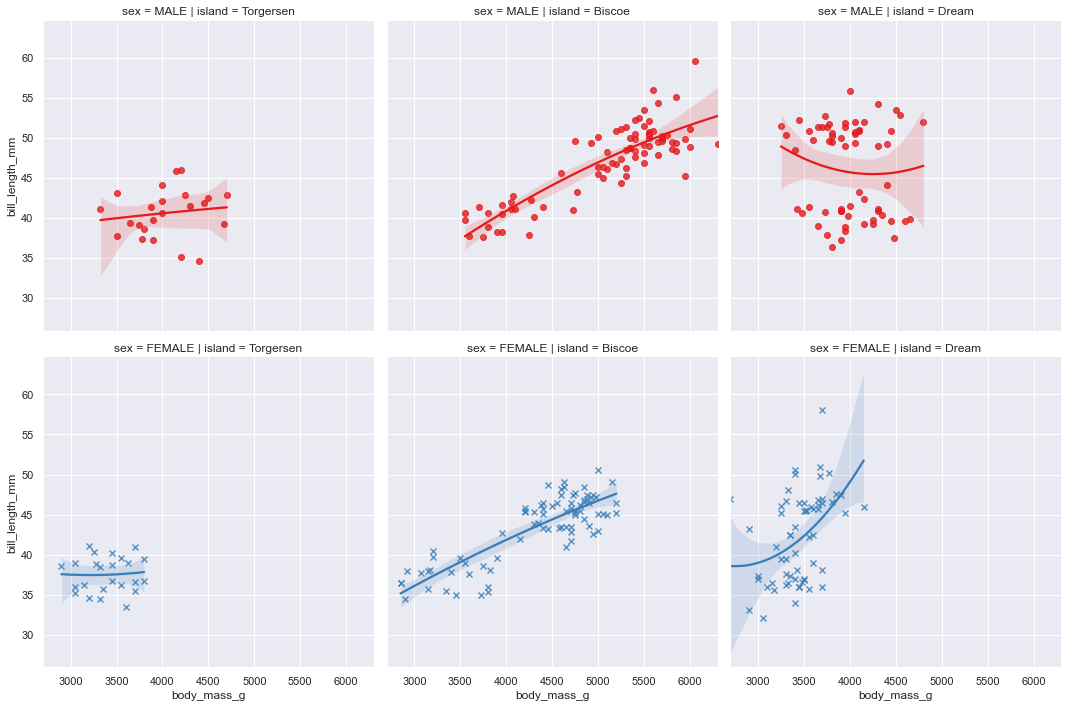

In [54]:
sns.lmplot(x="body_mass_g", y="bill_length_mm", hue="sex", col="island",row="sex",order=2, markers=["o", "x"],palette="Set1",data=bird)
plt.show()